# SOK-1006 v23
## Innleveringsoppgave 2
### Analyse av en merverdiavgift ("ad valorem tax")

Her skal vi se på virkningen av å ilegge en vare en skatt i henhold til dens verdi (merverdiavgift). Betrakt fremstillingen av markedet for oppdrettslaks i læreboka s. 101-104. Etterspørsel er gitt ved


\begin{equation}
   x^{D}= 500 -3.2p_k\tag{1}
\end{equation}

og tilbud:


\begin{equation}
   x^{S}= -100 + 4.3p_s\tag{2}
\end{equation}

Kjøpere betaler $p_k$ og selgere får $p_s$. Prisen som selgere får er det som konsumenter betaler minus mva $tp_k$, noe som betyr at $p_s=(1-t)p_k$. Her er $1>t\geq 0$ avgiftssatsen. Vi kan skrive (2) også som en funksjon på prisen som konsumenten betaler:

\begin{equation}
   x^{S}= -100 + 4.3 p_k(1-t)\tag{3}
\end{equation}



In [145]:
# importer pakkene
import numpy as np
from matplotlib import pyplot as plt
import sympy as sp

In [146]:
# Etterspørsel i likning (1)

def x_d(p):
    return 500 - 3.2*p

#Tilbud i likning (3)

def x_s(p,t):
    return -100+4.3*p*(1-t)


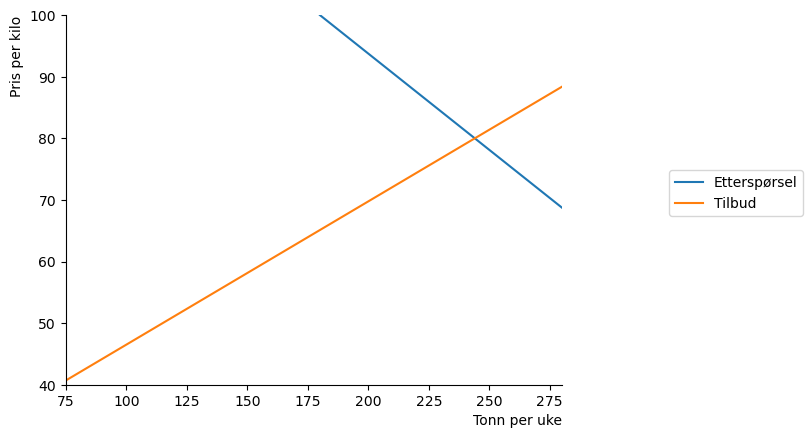

In [147]:
# vi lager en basisfigur

p_num=np.linspace(0.1,100,100)

def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris per kilo', loc='top')
                ax.set_xlabel('Tonn per uke', loc='right')
                ax.set(xlim=(75,280))
                ax.set(ylim=(40,100))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

fig, ax = create_ax()

# plott funksjonene

ax.plot(x_d(p_num),p_num, label='Etterspørsel')

ax.plot(x_s(p_num, 0),p_num, label='Tilbud')

ax.legend(bbox_to_anchor=(1.5,0.6));

   
1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0).
2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren.
3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.
4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?


#### 1. Tegn inn tilbudsfunksjon med 25% mva, og forklar hvorfor denne har brattere helning enn tilbudsfunksjon uten mva (t=0). 

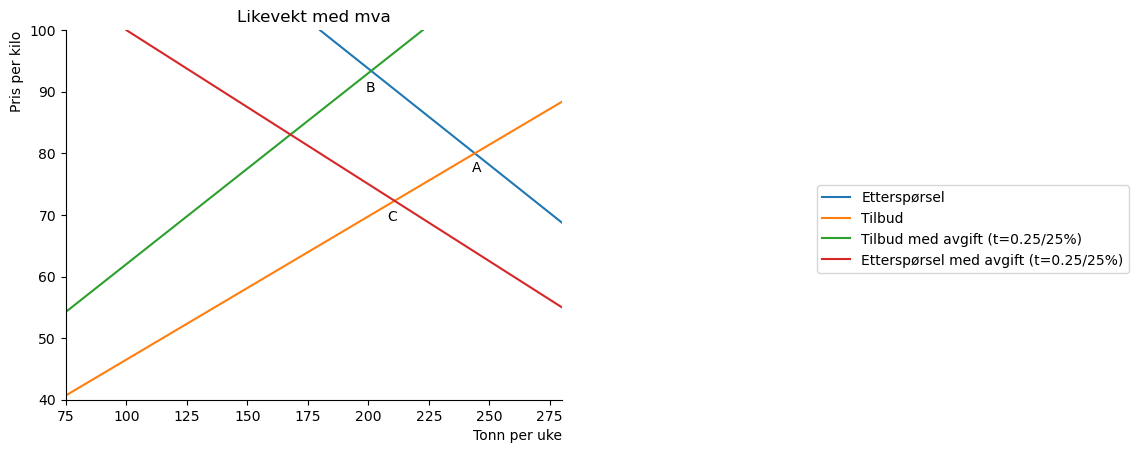

In [148]:
# Lager en ny etterspørselslinje. 
def x_d1(p, T):
    return 500 - 3.2*p*(1+T)

# Plotter de nye variablene. 
ax.plot(x_s(p_num, 0.25),p_num, label='Tilbud med avgift (t=0.25/25%)')
ax.plot(x_d1(p_num, 0.25),p_num, label='Etterspørsel med avgift (t=0.25/25%)')

# Navngir møtepunktene. 
ax.text(243,77,"A")
ax.text(199,90,"B")
ax.text(208,69,"C")

# Overskrift. 
ax.set_title("Likevekt med mva")

ax.legend(bbox_to_anchor=(1.5,0.6));

fig

# Denne stigningen er brattere grunnet at prisen blir 25% dyrere hele veien.

#### 2. Beregn likevektspris og -kvantum med og uten mva, og vis disse i figuren. 

In [149]:
# definer symboler i sympy. 

x, p, t, T = sp.symbols('x p t T', positive = True, real = True)

# cond for likevekt. 
eq_cond=sp.Eq(x_d1(p, T),x_s(p,t))
display(eq_cond)

# eq for p. 
p_eq=sp.solve(eq_cond,p)
display(p_eq[0])

# finner tilsvarende for kvantum. 
x_eq=x_s(p_eq[0],t)
display(x_eq)

Eq(-3.2*p*(T + 1) + 500, 4.3*p*(1 - t) - 100)

6000.0/(32.0*T - 43.0*t + 75.0)

25800.0*(1 - t)/(32.0*T - 43.0*t + 75.0) - 100

In [150]:
# Likevektspris som funksjon av t og T. 
p_eq_fn=sp.lambdify(
    (t,T), 
    p_eq[0]
)

p_eq_fn(t,T)

# Likevektskvantum som funksjon av t og T. 
x_eq_fn=sp.lambdify(
    (t,T), 
    x_eq
)

x_eq_fn(t,T)

# Kvantum. 
x_opt = round(x_eq_fn(0.25,0),2)
x_opt

# Pris. 
p_kons = round(p_eq_fn(0.25,0),2)
p_kons

# Hva produsenten sitter igjen med. 
p_kons * 0.80

# plotter en text slik at man får en forklarelse på hva som er hva. 
text = f"""Kvantum er {x_opt}. 
Prisen er {p_kons}kr, og det produsenten sitter igjen med er {p_kons*0.8}kr. 
"""

# Printer. 
print(text)

Kvantum er 201.17. 
Prisen er 93.39kr, og det produsenten sitter igjen med er 74.712kr. 



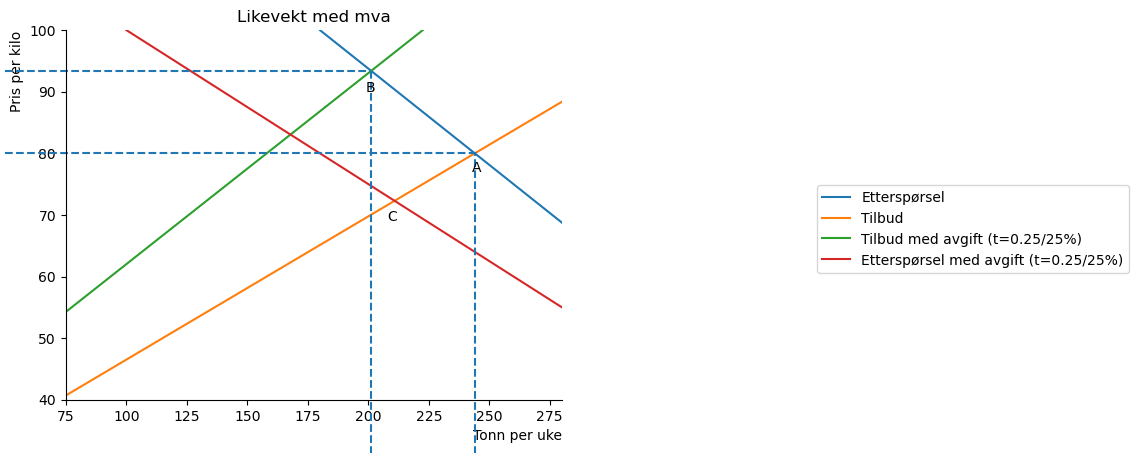

In [151]:
# setter inn linjer som viser likevekten. 

ax.vlines(x_eq_fn(0.25,0),25, 93.39, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0.25,0),50,201.2, linestyles='dashed', clip_on=False)
ax.hlines(p_eq_fn(0,0),50,245, linestyles='dashed', clip_on=False)
ax.vlines(x_eq_fn(0,0),25,80, linestyles='dashed', clip_on=False)

fig

#### 3. Beregn og vis inntekten til staten, og andelen som betales av konsumenter og produsenter.  

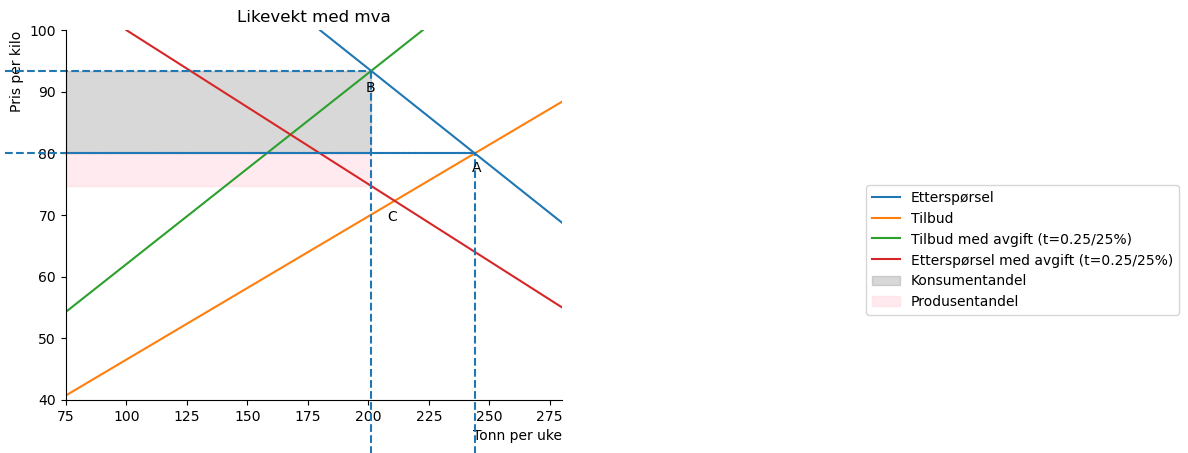

In [152]:
# illustrer hvem som betaler hva av avgiften. 

q=np.linspace (75, x_eq_fn(0.25,0), 100)


ax.hlines(p_eq_fn(0,0),75,x_eq_fn(0,0), linestyles='dashed')

ax.fill_between(q,p_kons,p_0, color = "gray",alpha = 0.3,label='Konsumentandel')
ax.fill_between(q,p_0,p_kons*0.80, color = "pink",alpha = 0.3,label='Produsentandel')

ax.legend(bbox_to_anchor=(1.6,0.6))

fig

#### 4. Hva er fordeler/ulemper av en mva og en stykkprisavgift?

Fordeler med mva er at staten får en prosentvis fortjeneste på alle varer, samt at etterspørsel går ned.

Ulempen er at denne kan bli enormt stor hvis det er en dyr vare den skal gjelde på.

Stykkprisavgift er feks bra for Svalbard for å minste strømning av turismen.
 
Ulempen kan være en lineær fortjeneste uavhengig av pris.